In [20]:
#Problem 1
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive



In [21]:
# 🔗 Mount Google Drive
drive.mount('/content/drive')

# 📂 Load dataset
file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/diabetes.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# 🎯 Features and binary labels
X = df.drop(columns=['Outcome'])
y = df['Outcome']


In [23]:
# 🎯 Separate features and labels (assuming the target column is named 'Outcome')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# ✂️ Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# 🔁 Track training accuracy over 100 iterations
sgd = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True)
train_acc = []

for i in range(100):
    sgd.fit(X_train_scaled, y_train)
    y_train_pred = sgd.predict(X_train_scaled)
    acc = accuracy_score(y_train, y_train_pred)
    train_acc.append(acc)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

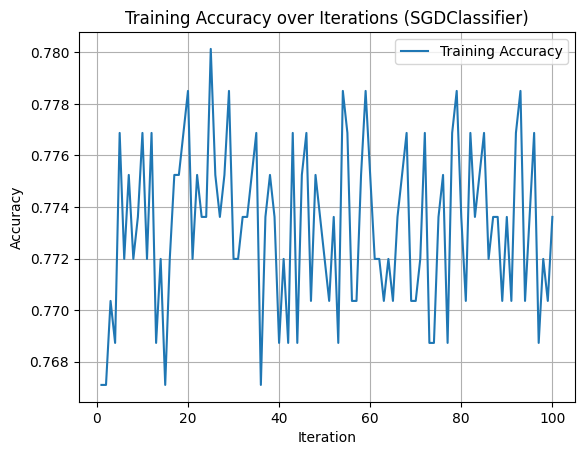

🔹 Final Evaluation on Test Set:
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549


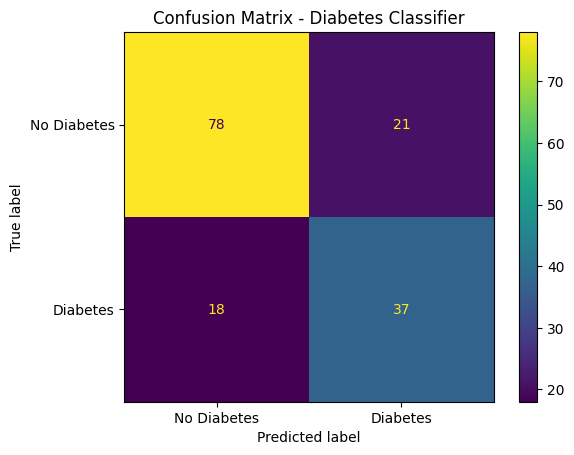

In [26]:
# 📈 Plot training accuracy
plt.plot(range(1, 101), train_acc, label='Training Accuracy')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Training Accuracy over Iterations (SGDClassifier)")
plt.grid(True)
plt.legend()
plt.show()

# ✅ Final evaluation on test set
y_pred = sgd.predict(X_test_scaled)
print("🔹 Final Evaluation on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# 📉 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot()
plt.title("Confusion Matrix - Diabetes Classifier")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

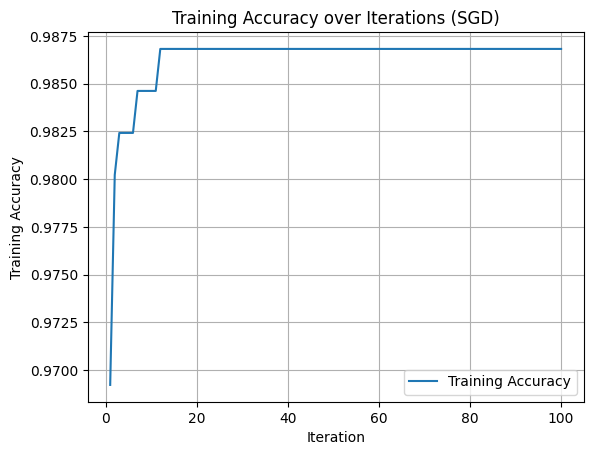

🔹 Logistic Regression (No Penalty):
Accuracy: 0.9825
Precision: 0.9767
Recall: 0.9767
F1 Score: 0.9767


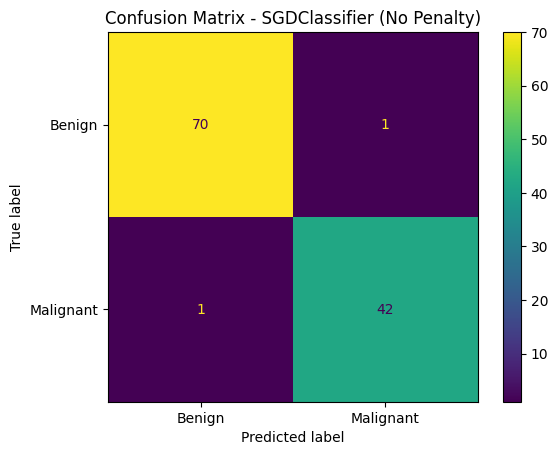

In [27]:
#Problem 2.1
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# 🔗 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📂 Load your cancer dataset
file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/cancer.csv'
df = pd.read_csv(file_path)

# 🧹 Assume target column is named 'target' or 'diagnosis'
# Map diagnosis if needed (e.g., M = 1, B = 0)
if 'diagnosis' in df.columns:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# 🧾 Prepare features and labels
X = df.drop(columns=['diagnosis', 'id', 'Unnamed: 32']) # Drop 'id' and 'Unnamed: 32' as well as they are not features
y = df['diagnosis']

# ✂️ Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔁 Train with SGDClassifier to track accuracy
sgd = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True)
accuracies = []

for i in range(100):
    sgd.fit(X_train_scaled, y_train)
    y_train_pred = sgd.predict(X_train_scaled)
    acc = accuracy_score(y_train, y_train_pred)
    accuracies.append(acc)

# 📈 Plot accuracy over iterations
plt.plot(range(1, 101), accuracies, label='Training Accuracy')
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy over Iterations (SGD)")
plt.legend()
plt.grid(True)
plt.show()

# 🧪 Final evaluation on test set
y_pred = sgd.predict(X_test_scaled)
print("🔹 Logistic Regression (No Penalty):") # This should be SGDClassifier results
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# 📉 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
disp.plot()
plt.title("Confusion Matrix - SGDClassifier (No Penalty)")
plt.show()

🔸 Logistic Regression (With Penalty):
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9535
F1 Score: 0.9762


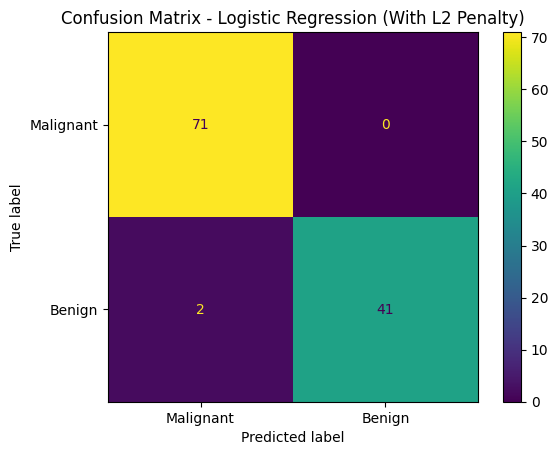

In [28]:
#Problem 2.2
from sklearn.linear_model import LogisticRegression

# 🔁 Train with L2 Penalty
penalized_model = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)
penalized_model.fit(X_train_scaled, y_train)
y_pred_pen = penalized_model.predict(X_test_scaled)

# 🧪 Metrics
print("🔸 Logistic Regression (With Penalty):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pen):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_pen):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_pen):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_pen):.4f}")

# 📉 Confusion Matrix
cm_pen = confusion_matrix(y_test, y_pred_pen)
disp_pen = ConfusionMatrixDisplay(confusion_matrix=cm_pen, display_labels=["Malignant", "Benign"])
disp_pen.plot()
plt.title("Confusion Matrix - Logistic Regression (With L2 Penalty)")
plt.show()

🧪 Naive Bayes Results:
Accuracy:  0.9649
Precision: 0.9589
Recall:    0.9859
F1 Score:  0.9722


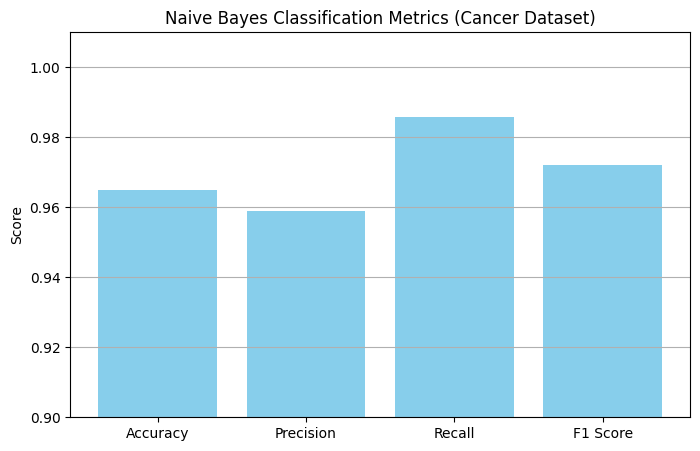

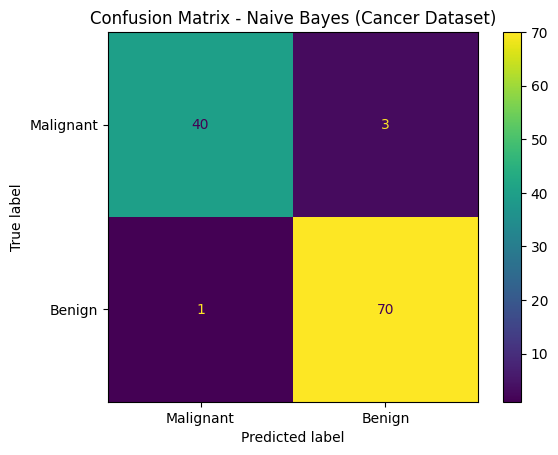

In [29]:
#Problem 3
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# 🧬 Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ✂️ Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ⚖️ Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Train Naive Bayes
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# 🔮 Predictions
y_pred = model.predict(X_test_scaled)

# 🧾 Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ✅ Print results
print("🧪 Naive Bayes Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 📊 Bar chart of metrics
metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color='skyblue')
plt.ylim(0.9, 1.01)
plt.title("Naive Bayes Classification Metrics (Cancer Dataset)")
plt.ylabel("Score")
plt.grid(axis='y')
plt.show()

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant", "Benign"])
disp.plot()
plt.title("Confusion Matrix - Naive Bayes (Cancer Dataset)")
plt.show()



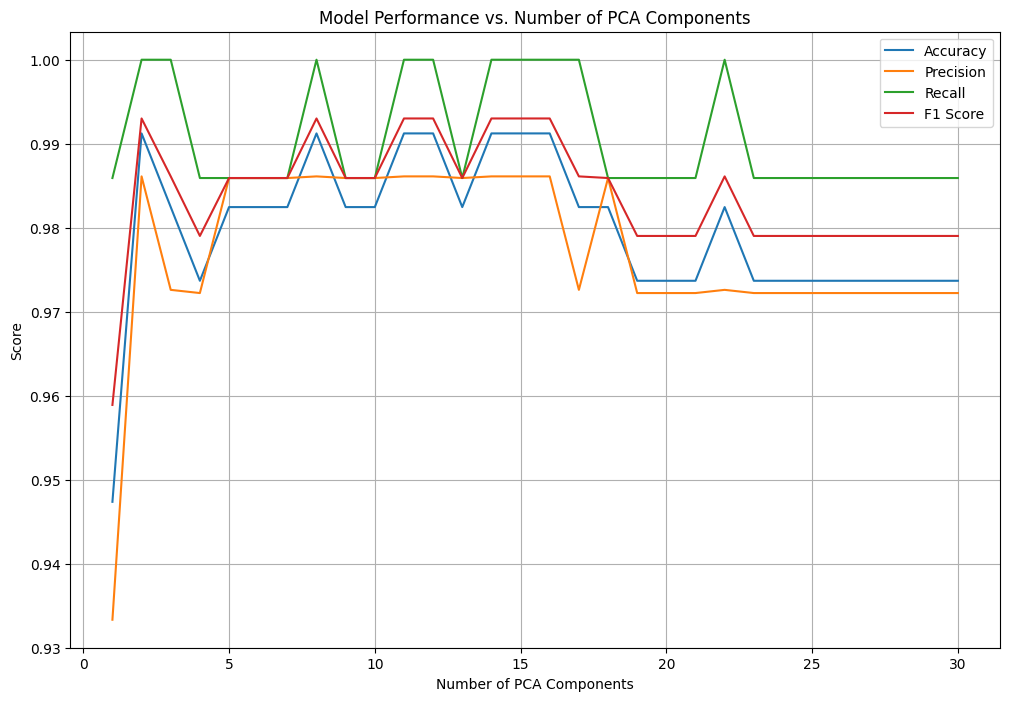


📌 Best number of PCA components (by accuracy): 2
✅ Highest Accuracy: 0.9912


In [30]:
#Problem 4
# 📦 Imports
from sklearn.decomposition import PCA

# 🧬 Load the cancer dataset (again if needed)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ✂️ Train-test split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ⚖️ Standardize before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📊 Store results
acc_list, prec_list, rec_list, f1_list = [], [], [], []
component_range = range(1, X.shape[1] + 1)  # From 1 to 30

# 🔁 Loop over different PCA component counts
for k in component_range:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc_list.append(accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred))
    rec_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

# 📈 Plot results
plt.figure(figsize=(12, 8))
plt.plot(component_range, acc_list, label='Accuracy')
plt.plot(component_range, prec_list, label='Precision')
plt.plot(component_range, rec_list, label='Recall')
plt.plot(component_range, f1_list, label='F1 Score')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.title('Model Performance vs. Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()

# 🏆 Best number of components (by accuracy)
best_k = np.argmax(acc_list) + 1
best_accuracy = max(acc_list)
print(f"\n📌 Best number of PCA components (by accuracy): {best_k}")
print(f"✅ Highest Accuracy: {best_accuracy:.4f}")


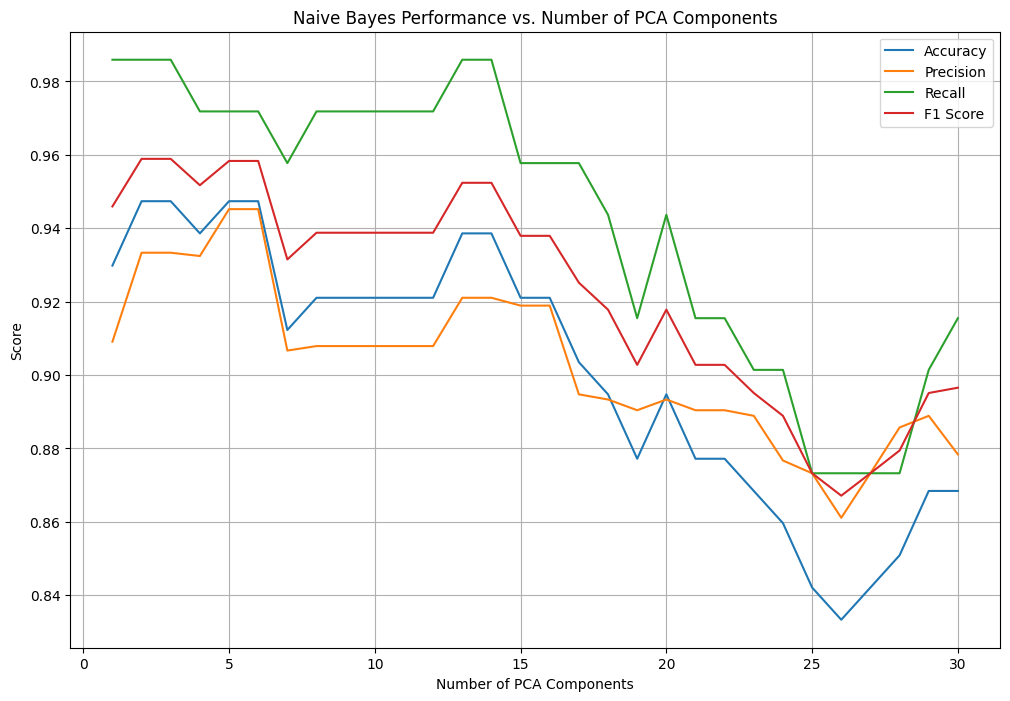


📌 Best number of PCA components (Naive Bayes): 2
✅ Highest Accuracy: 0.9474


In [31]:
#Problem 5
# 📦 Imports (if not already done)
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 🧬 Load dataset (again if needed)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ✂️ Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ⚖️ Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔁 Evaluate over different PCA component sizes
acc_list, prec_list, rec_list, f1_list = [], [], [], []
component_range = range(1, X.shape[1] + 1)  # 1 to 30

for k in component_range:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    nb_model = GaussianNB()
    nb_model.fit(X_train_pca, y_train)
    y_pred = nb_model.predict(X_test_pca)

    acc_list.append(accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred))
    rec_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

# 📊 Plot scores
plt.figure(figsize=(12, 8))
plt.plot(component_range, acc_list, label='Accuracy')
plt.plot(component_range, prec_list, label='Precision')
plt.plot(component_range, rec_list, label='Recall')
plt.plot(component_range, f1_list, label='F1 Score')
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.title('Naive Bayes Performance vs. Number of PCA Components')
plt.legend()
plt.grid(True)
plt.show()

# 🏆 Best number of components by accuracy
best_k = np.argmax(acc_list) + 1
best_acc = max(acc_list)
print(f"\n📌 Best number of PCA components (Naive Bayes): {best_k}")
print(f"✅ Highest Accuracy: {best_acc:.4f}")
